In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Cargo input

In [3]:
# Cargamos datos
pisos_cleaned = pd.read_csv("data origin/pisos_cleaned_agrupando__2021.csv", delimiter=';') # cargamos fichero

In [4]:
###### Esta funcion actualiza el número de instancias y features de mi modelo
def status_cols_rows (df):
    entries = df.shape[0]
    features =df.shape[1]
    print ('Nº de entradas:', entries)
    print ('Nº de features:', features)

In [5]:
status_cols_rows(pisos_cleaned)

Nº de entradas: 3556
Nº de features: 19


Elimino las columnas que no nos interesan para el modelo de regresion

In [6]:
columns_with_no_interest=['titulo', 'desc']

In [7]:
pisos_cleaned=pisos_cleaned.drop(columns_with_no_interest, axis=1)

### A partir de aquí, trabajo primero con train y despues aplico las mismas modificaciones a test

##Hago la division de TRAIN y TEST (70-30)

In [8]:
#Hago la division en train y test (70%-30%)
dftrain, dftest = train_test_split(pisos_cleaned, test_size=0.3, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {dftrain.shape}')
print(f'Dimensiones del dataset de test: {dftest.shape}')




Dimensiones del dataset de training: (2489, 17)
Dimensiones del dataset de test: (1067, 17)


Comienzo a trabajar con el dataset de DFTRAIN

In [9]:
#Trabajo ahora sobre las categorias categoricas para transformarlas en numéricas
categorical_features = (dftrain.dtypes==object) 
categorical_cols = dftrain.columns[categorical_features]
categorical_cols

Index(['long', 'lat', 'planta', 'tipo_vivienda', 'barrio', 'ciudad'], dtype='object')

In [10]:
#Mean-encoder en todas las columnas categóricas
mean_map = {}
for c in categorical_cols:
    means = dftrain.groupby(c)['precio'].mean()
    dftrain[c] = dftrain[c].map(means)
    mean_map[c]=means
    

In [11]:
dftrain.isna().sum()

precio                          0
dist_centro                   359
long                            0
lat                             0
long_                         359
lat_                          359
metros                          0
planta                          0
tipo_vivienda                   0
n_banos                         0
n_habitaciones                  0
barrio                          0
ciudad                          0
renta_media_barrio_persona      3
ascensor                        0
garaje                          0
trastero                        0
dtype: int64

In [12]:
dftrain=dftrain.dropna()

In [13]:
status_cols_rows(dftrain)

Nº de entradas: 2127
Nº de features: 17


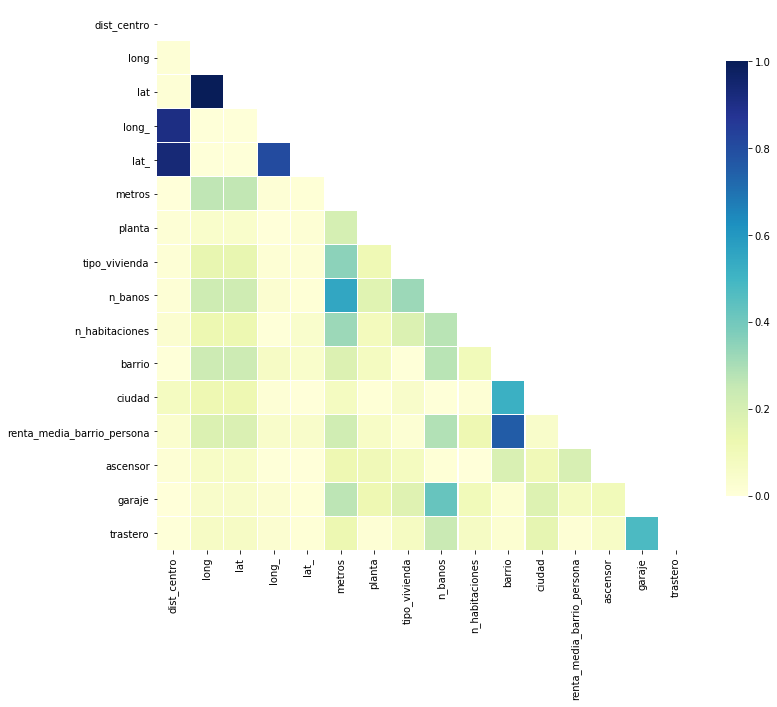

In [14]:
#Hago un grafico sencillo de correlaciones para eliminar las variables que más correladas estén
import seaborn as sns

def Triangulo_corr (dataset):
    corr = np.abs(dataset.drop(['precio'], axis=1).corr())
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8});

    
Triangulo_corr(dftrain)



Observo que las variables más correladas son:

- lat_, long_ con dist_centro
- lat con long

Borro lat_, long_ 


In [15]:
columns_correlated=['lat_','long_','lat']
dftrain=dftrain.drop(columns_correlated,axis=1)

Lo mismo a DFTEST

In [16]:
#Trabajo ahora sobre las categorias categoricas para transformarlas en numéricas
categorical_features = dftest.dtypes==object
categorical_cols = dftest.columns[categorical_features]
categorical_cols

Index(['long', 'lat', 'planta', 'tipo_vivienda', 'barrio', 'ciudad'], dtype='object')

In [17]:
#Mean-encoder en todas las columnas categóricas
mean_map_test = {}
for c in categorical_cols:
    means=mean_map[c]
    dftest[c] = dftest[c].map(means)
    mean_map_test[c]=means

In [18]:
dftest.isna().sum()

precio                          0
dist_centro                   163
long                          170
lat                           169
long_                         163
lat_                          163
metros                          0
planta                          0
tipo_vivienda                   0
n_banos                         0
n_habitaciones                  0
barrio                          0
ciudad                          0
renta_media_barrio_persona      0
ascensor                        0
garaje                          0
trastero                        0
dtype: int64

In [19]:
dftest=dftest.dropna()

In [20]:
status_cols_rows(dftest)

Nº de entradas: 764
Nº de features: 17


#### Observamos que para el dataset de test se cumplen las mismas correlaciones 

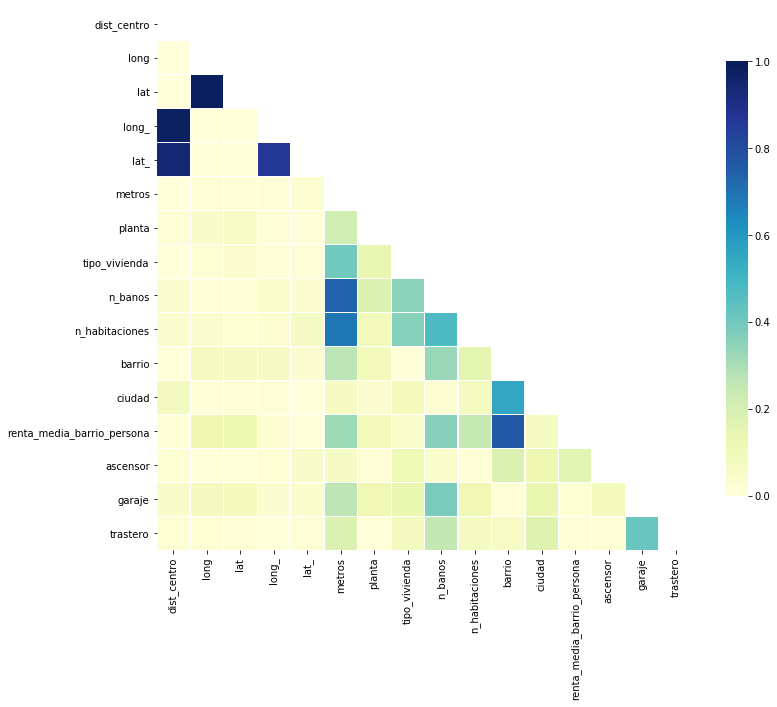

In [21]:
Triangulo_corr(dftest)

In [22]:
columns_correlated=['lat_','long_','lat']
dftest=dftest.drop(columns_correlated,axis=1)

GUARDO LOS DATOS DE TRAIN Y TEST EN UN CSV PARA ML 

In [23]:
# Guardamos
dftrain.to_csv('train_cleaned_agrupando_2021.csv', sep=';', decimal='.', index=False)
dftest.to_csv('test_cleaned_agrupando_2021.csv', sep=';', decimal='.', index=False)